Authored by Jay Patel for CPE 695 Summer 2024

1) supervised learning

Supervised learning is a machine learning algorithm that learns from labeled data. In other words, a model is trained with input parameters and the given output that is expected. An example of this is linear regression.


2) unsupervised learning

Unsupervised learning is a machine learning algorithm that learns from unlabeled data. In other words, a model is trained with only input parameters and no expected outputs. A good use of unsupervised learning is to find patterns and relationships within a dataset that are not innately obvious. An example of unsupervised learning is the k-means clustering algorithm.


3) online learning

Online learning is a technique in machine learning when you train your system incrementally by feeeding in data instances sequentially, either individually or in small batches. Online learning works well for systems where data is continuously changing, for example if there was a machine learning model being trained with stock prices.

4) batch learning

Batch learning is a technique in machine learning where the system is not able to be trained incrementally, and instead it is trained once using all available data. If you want the system to learn about new data, it must be trained again, with the new data AND the old data
    

5) model-based learning

Model-based learning involves creating a model that can predict values based off of input data. In model-based learning, training data is used to create a generalized model that will be used to make predictions. 

6) instance-based learning

Instance-based learning is when a system learns by storing all instances of data and making predictions off these instances. Basically, a similarity measure is used to compare new instances with already learned instances to make classifications. 

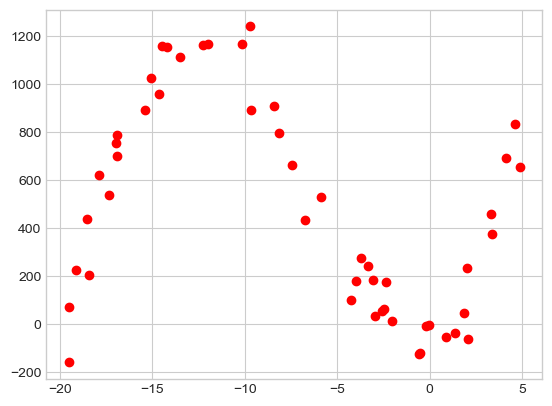

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

noise_scale = 100
number_of_samples = 50
x = 25 * (np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)
plt.plot(x, y, 'ro')
plt.show()



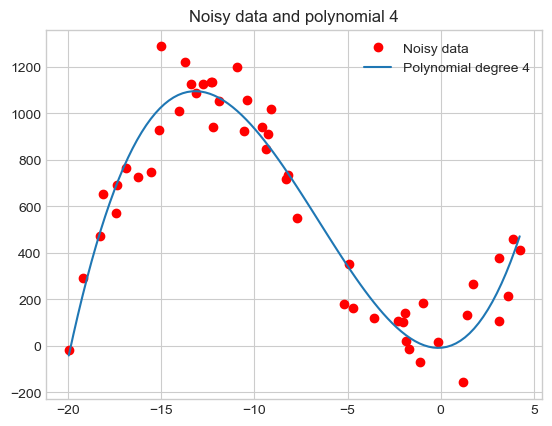

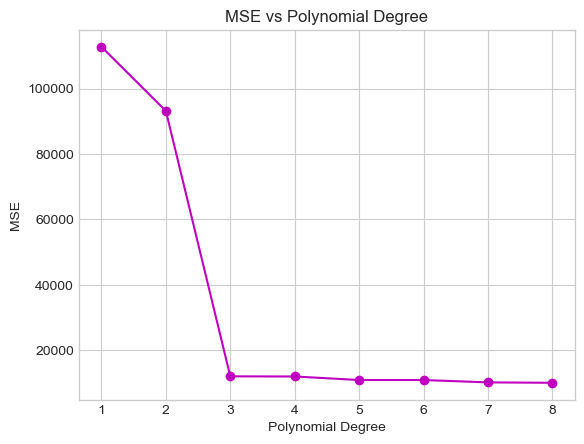

Best degree: 8


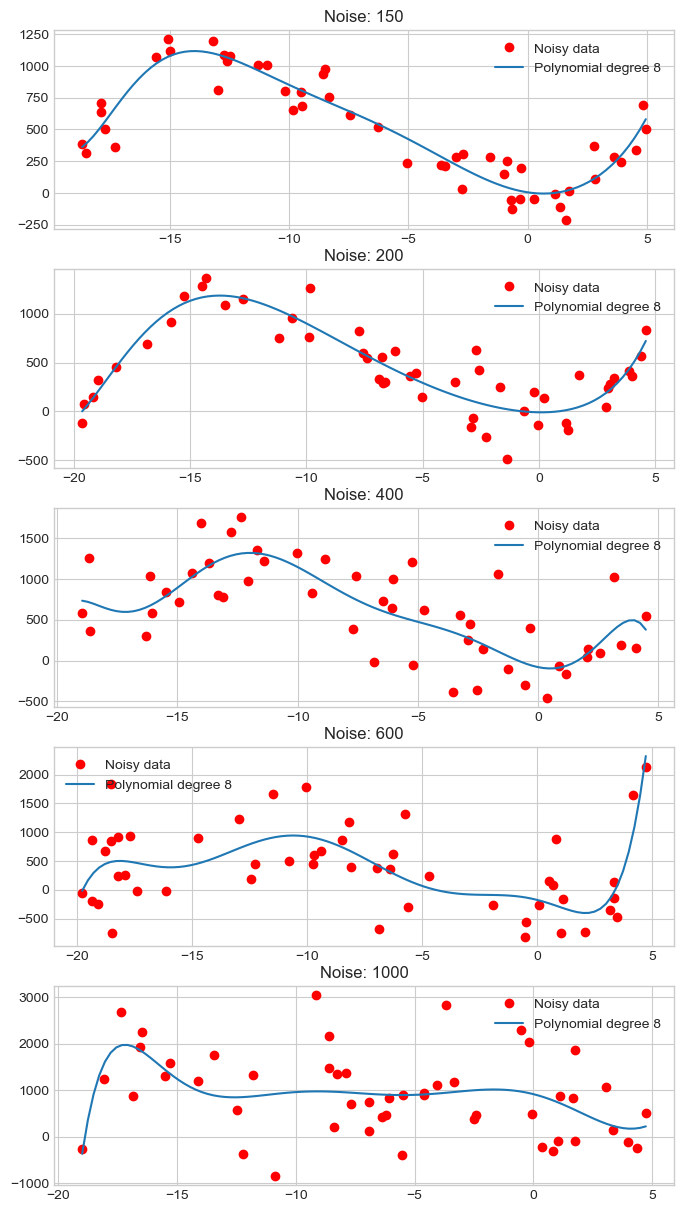

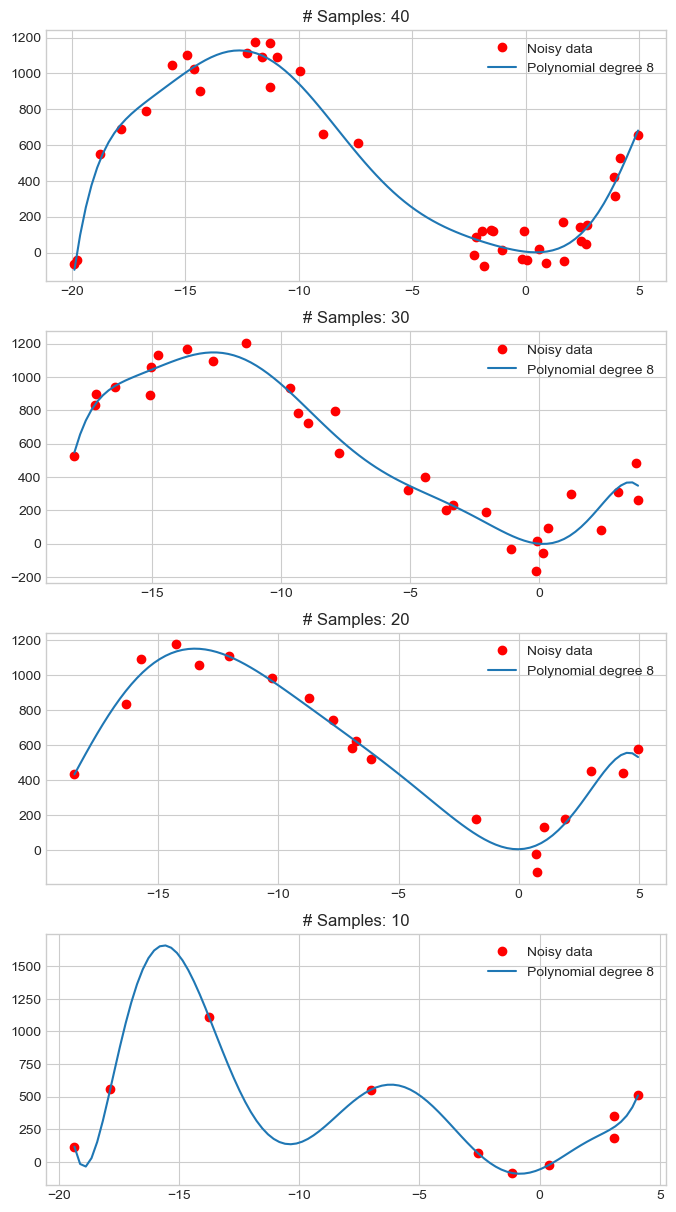

['Noise: 150, MSE: 17219.092605735314', 'Noise: 200, MSE: 36569.19682773505', 'Noise: 400, MSE: 133981.8195573958', 'Noise: 600, MSE: 299706.050918216', 'Noise: 1000, MSE: 623904.3003994004']
['Samples: 40, MSE: 5792.540366372458', 'Samples: 30, MSE: 8550.995930720554', 'Samples: 20, MSE: 4851.045981162236', 'Samples: 10, MSE: 1416.512408644292']


In [4]:
noise_scale = 100
number_of_samples = 50
x = 25 * (np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)

def plot_noisy_data_and_polynomial(x, y, degree, ax):
    coeffs = np.polyfit(x.flatten(), y.flatten(), degree)  #use polyfit to generate coeffecients for each x var in the polynomial.
    p = np.poly1d(coeffs) #create polynomial function 
    
    x_plot = np.linspace(min(x), max(x), 100) ##generate 100 evenly spaced values between min and max x.
    y_plot = p(x_plot) #using polynomial func, plug in x values to get ys. 
    
    ax.plot(x, y, 'ro', label='Noisy data')
    ax.plot(x_plot, y_plot, label=f'Polynomial degree {degree}')
    ax.legend()

def calculate_mse(x, y, degree):
    coeffs = np.polyfit(x.flatten(), y.flatten(), degree)  #use polyfit to generate coeffecients for each x var in the polynomial.
    p = np.poly1d(coeffs) #create polynomial function 
    y_pred = p(x) #y values from coeff
    mse = np.mean((y - y_pred)**2) #mse calc
    return mse

#Plot noisy data and polynomial
fig, ax = plt.subplots()
degree = 4
plot_noisy_data_and_polynomial(x, y, degree, ax)  
plt.title(f'Noisy data and polynomial {degree}')
plt.show()

# Step 2: Plot MSE vs polynomial degree
degrees = range(1, 9) 
mses = [calculate_mse(x, y, degree) for degree in degrees] #generate MSE for each degree

fig, ax = plt.subplots()
ax.plot(degrees, mses, 'mo-')
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.show()

best_degree = degrees[np.argmin(mses)]
print(f'Best degree: {best_degree}')

# Step 3: Vary noise scale and plot results
noise_scales = [150, 200, 400, 600, 1000]
mse_noise = []

fig, axs = plt.subplots(len(noise_scales), 1, figsize=(8, 15))
for i, scale in enumerate(noise_scales):
    x = 25 * (np.random.rand(number_of_samples, 1) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + scale * np.random.randn(number_of_samples, 1)
    plot_noisy_data_and_polynomial(x, y, best_degree, axs[i])
    mse = calculate_mse(x,y,best_degree)
    mse_noise.append(f'Noise: {scale}, MSE: {mse}')
    axs[i].set_title(f'Noise: {scale}')
    

plt.show()

# Step 4: Vary number of samples and plot results
number_of_samples_list = [40, 30, 20, 10]
mse_samples = []

fig, axs = plt.subplots(len(number_of_samples_list), 1, figsize=(8, 15))
for i, samples in enumerate(number_of_samples_list):
    x = 25 * (np.random.rand(samples, 1) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale * np.random.randn(samples, 1)
    plot_noisy_data_and_polynomial(x, y, best_degree, axs[i])
    mse = calculate_mse(x,y,best_degree)
    mse_samples.append(f'Samples: {samples}, MSE: {mse}')
    axs[i].set_title(f'# Samples: {samples}')

plt.show()
print(mse_noise)
print(mse_samples)


2) The best degree is 8 because it minimizes MSE. IE, with a degreee of 8, the mean squared error is the least from the polynomial in respect to the noisy data.

3) As shown by the MSE cost function, as the number of noise grows, so does the MSE. That is because the noise generates more and more data that is not fitting within the polynomial (without overfitting), which results in a higher measure of error

4) As shown by the MSE cost function,  there is no conclusive evidence that the number of samples changes the fitting of the polynomial and therefore the MSE. From samples 40 to 30 there is a significant drop in MSE, although from 30 to 30, it once again grows. This is because the samples are randomly generated, and therefore do not have a tendency to cause for better fitting. Of course, as the number of samples gets very small, there are few data points to fit and therefore MSE could get better,  but due to the randomness of the samples, when there is a relatively large number of samples, the MSE is not easily predicted strictly through the sample count.


